In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-attrition/IBM-Attrition.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/ibm-attrition/IBM-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.select_dtypes(include= np.object).head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [7]:
data.select_dtypes(include= np.object).nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [8]:
data[data.select_dtypes(include=np.object).columns[0]].head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [9]:
data.select_dtypes(include= np.int64).head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


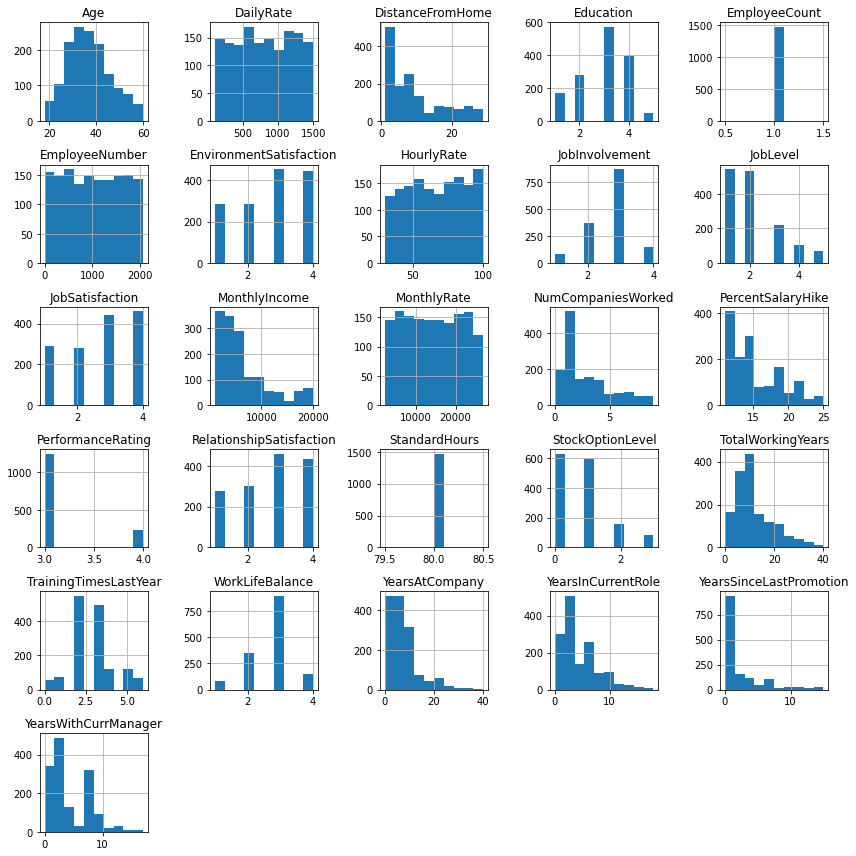

In [10]:
# data distribution
data.select_dtypes(include= np.int64).hist(figsize = (12,12))
plt.tight_layout()
plt.show()

In [11]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


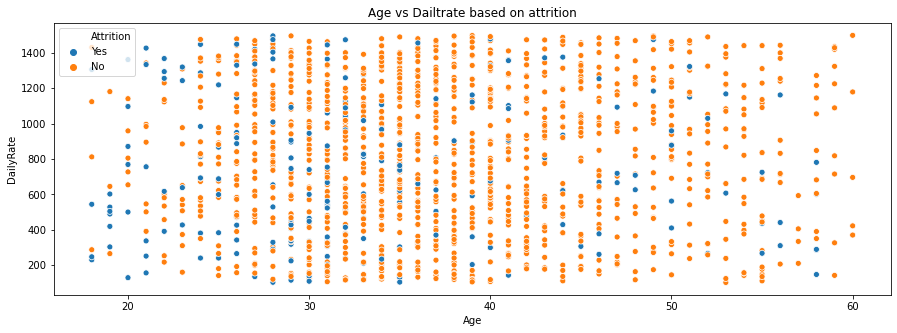

In [12]:
plt.figure(figsize= (15,5))
sns.scatterplot(x = 'Age', y = 'DailyRate', data = data, hue = 'Attrition')
plt.title('Age vs Dailtrate based on attrition')
plt.show()

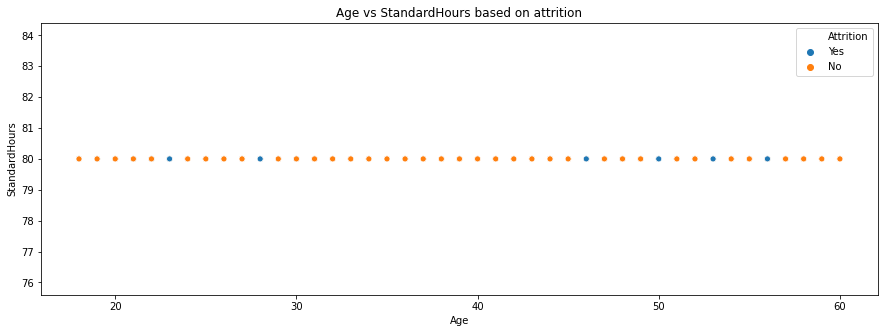

In [13]:
plt.figure(figsize= (15,5))
sns.scatterplot(x = 'Age', y = 'StandardHours', data = data, hue = 'Attrition')
plt.title('Age vs StandardHours based on attrition')
plt.show()

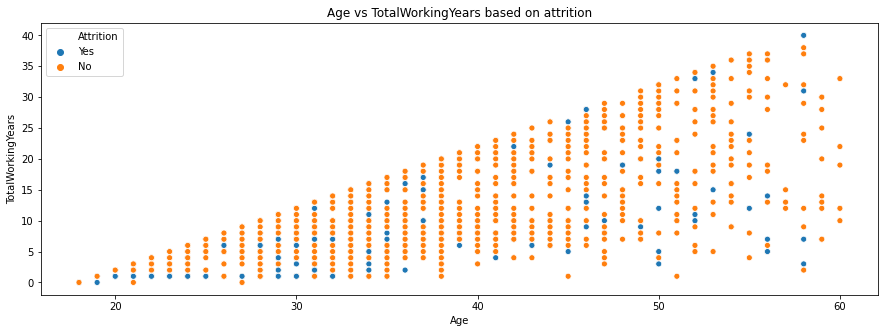

In [14]:
plt.figure(figsize= (15,5))
sns.scatterplot(x = 'Age', y = 'TotalWorkingYears', data = data, hue = 'Attrition')
plt.title('Age vs TotalWorkingYears based on attrition')
plt.show()

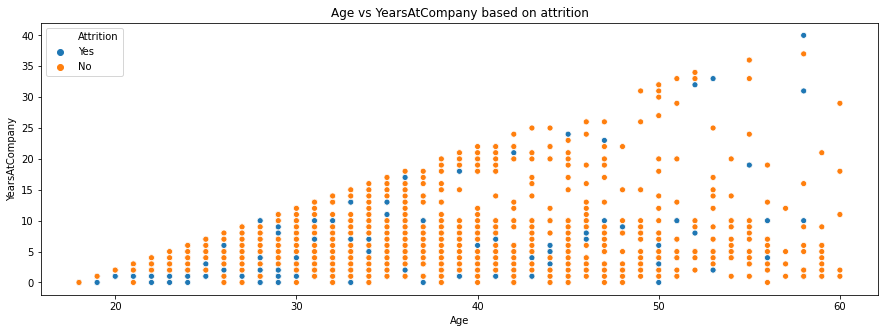

In [15]:
plt.figure(figsize= (15,5))
sns.scatterplot(x = 'Age', y = 'YearsAtCompany', data = data, hue = 'Attrition')
plt.title('Age vs YearsAtCompany based on attrition')
plt.show()

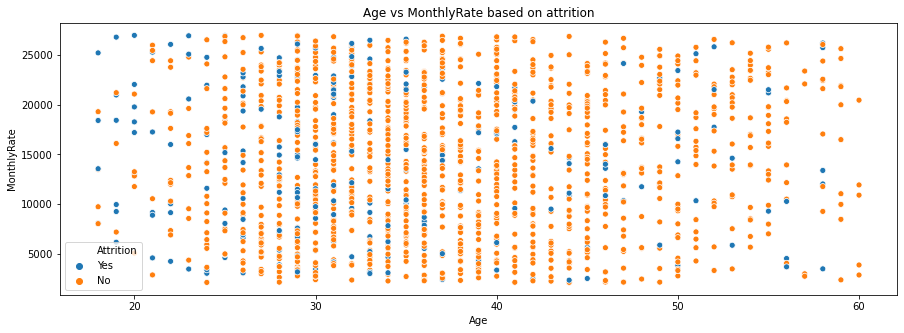

In [16]:
plt.figure(figsize= (15,5))
sns.scatterplot(x = 'Age', y = 'MonthlyRate', data = data, hue = 'Attrition')
plt.title('Age vs MonthlyRate based on attrition')
plt.show()

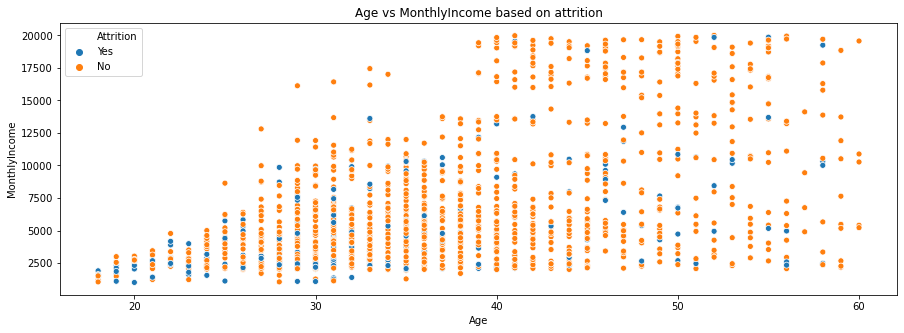

In [17]:
plt.figure(figsize= (15,5))
sns.scatterplot(x = 'Age', y = 'MonthlyIncome', data = data, hue = 'Attrition')
plt.title('Age vs MonthlyIncome based on attrition')
plt.show()

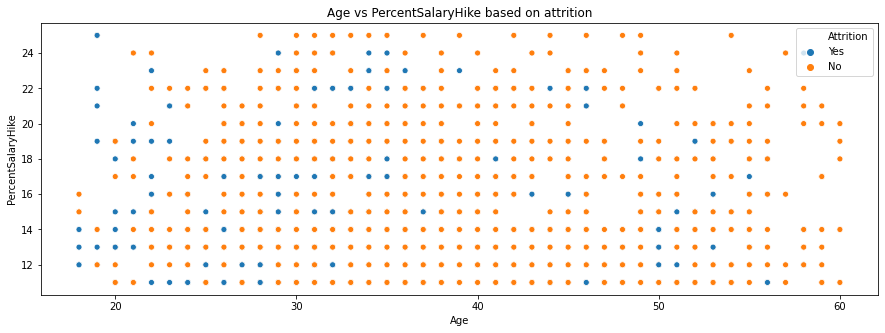

In [18]:
plt.figure(figsize= (15,5))
sns.scatterplot(x = 'Age', y = 'PercentSalaryHike', data = data, hue = 'Attrition')
plt.title('Age vs PercentSalaryHike based on attrition')
plt.show()

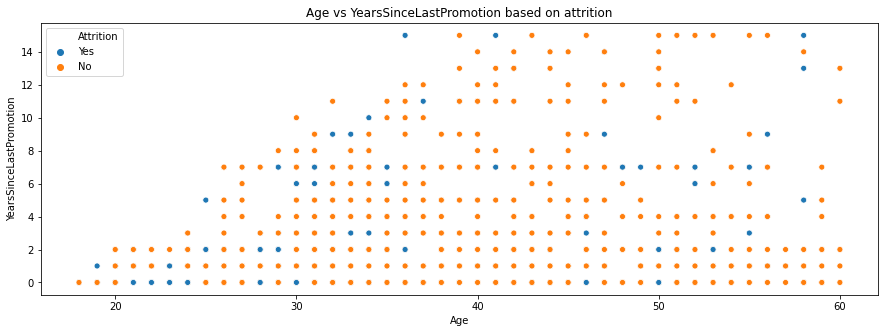

In [19]:
plt.figure(figsize= (15,5))
sns.scatterplot(x = 'Age', y = 'YearsSinceLastPromotion', data = data, hue = 'Attrition')
plt.title('Age vs YearsSinceLastPromotion based on attrition')
plt.show()

### Category wise attrition rates

In [20]:
data.select_dtypes(include= np.object).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [24]:
data.groupby('BusinessTravel')['Attrition'].value_counts()

BusinessTravel     Attrition
Non-Travel         No           138
                   Yes           12
Travel_Frequently  No           208
                   Yes           69
Travel_Rarely      No           887
                   Yes          156
Name: Attrition, dtype: int64

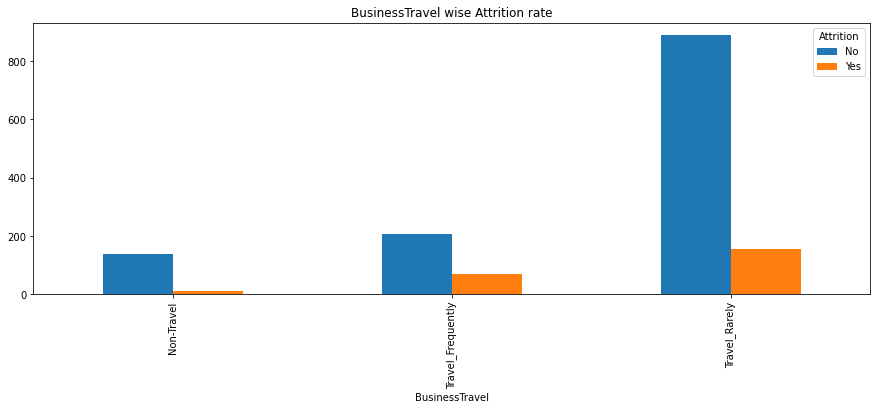

In [38]:
# for plotting this is the best way
pd.crosstab(data['BusinessTravel'], data['Attrition']).plot(kind = 'bar', figsize = (15,5))
plt.title('BusinessTravel wise Attrition rate')
plt.show()

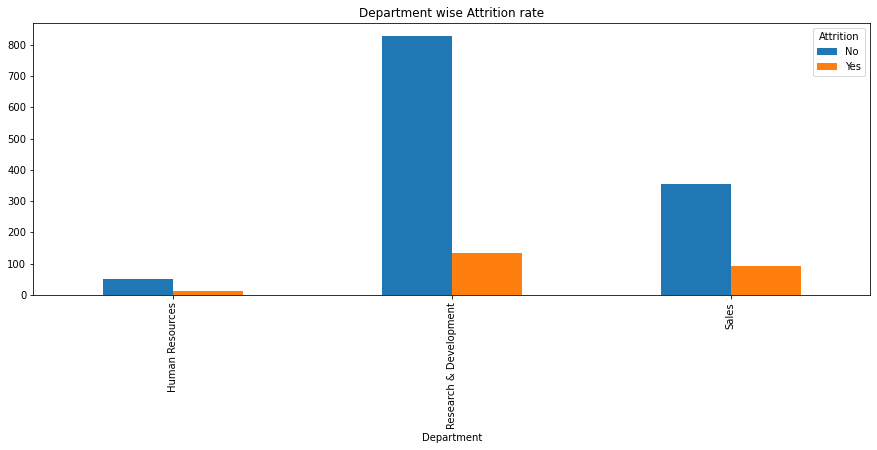

In [39]:
pd.crosstab(data['Department'], data['Attrition']).plot(kind = 'bar', figsize = (15,5))
plt.title('Department wise Attrition rate')
plt.show()

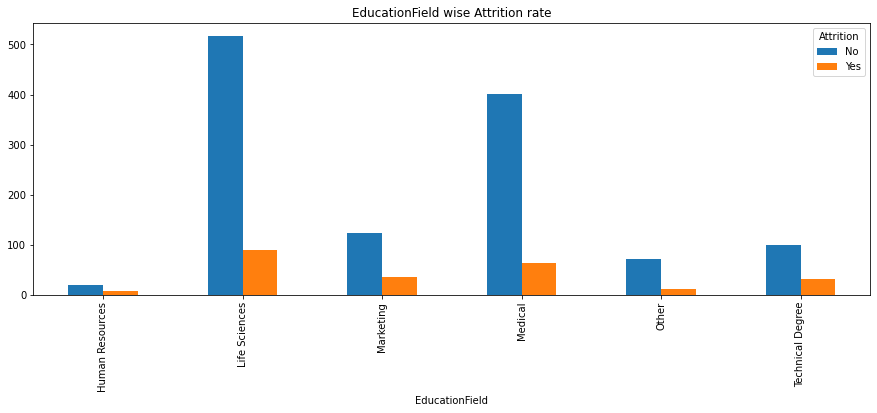

In [40]:
pd.crosstab(data['EducationField'], data['Attrition']).plot(kind = 'bar', figsize = (15,5))
plt.title('EducationField wise Attrition rate')
plt.show()

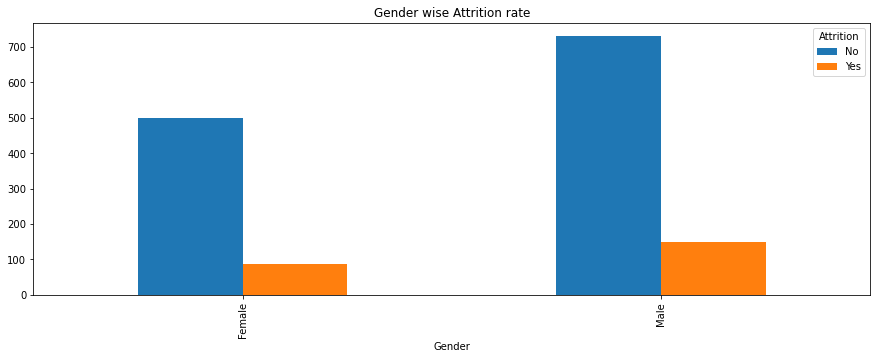

In [41]:
pd.crosstab(data['Gender'], data['Attrition']).plot(kind = 'bar', figsize = (15,5))
plt.title('Gender wise Attrition rate')
plt.show()

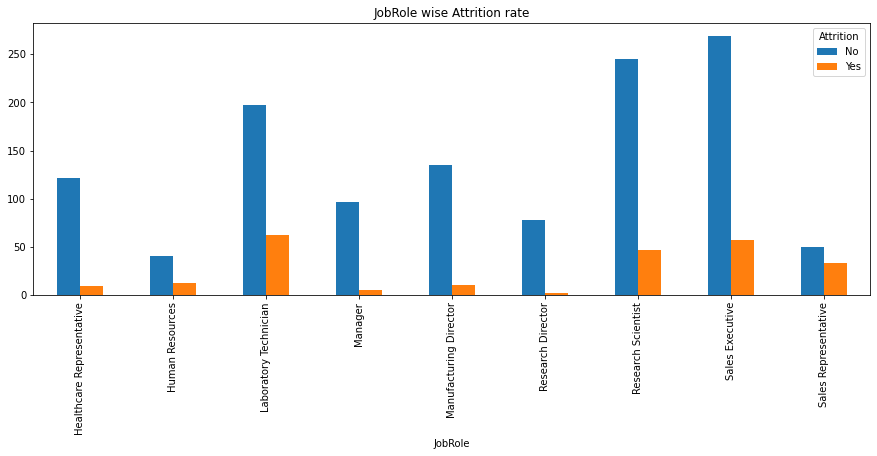

In [42]:
pd.crosstab(data['JobRole'], data['Attrition']).plot(kind = 'bar', figsize = (15,5))
plt.title('JobRole wise Attrition rate')
plt.show()

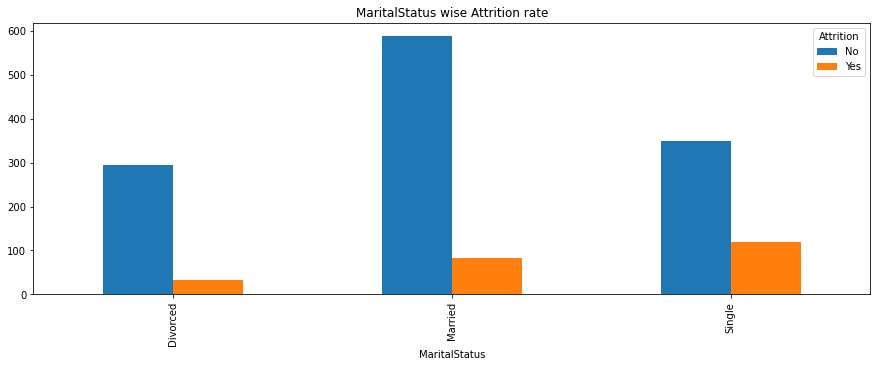

In [44]:
pd.crosstab(data['MaritalStatus'], data['Attrition']).plot(kind = 'bar', figsize = (15,5))
plt.title('MaritalStatus wise Attrition rate')
plt.show()

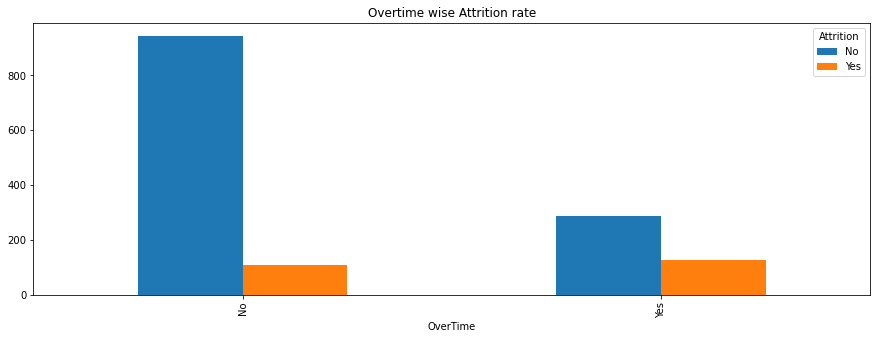

In [45]:
pd.crosstab(data['OverTime'], data['Attrition']).plot(kind = 'bar', figsize = (15,5))
plt.title('Overtime wise Attrition rate')
plt.show()